<a href="https://colab.research.google.com/github/shweta1290/pytorch/blob/main/01_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow
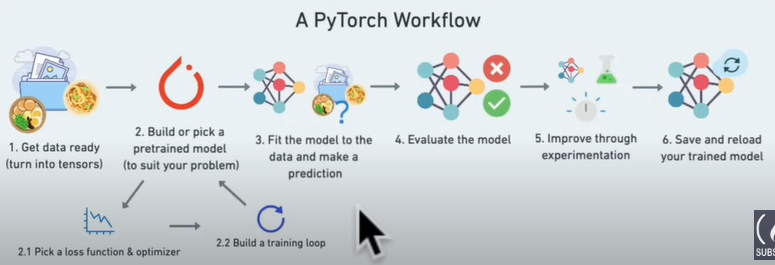

In [ ]:
import torch
from torch import nn #nn contains all building blocks for nn
import matplotlib.pyplot as plt
torch.__version__

'2.3.0+cu121'

#Data preparing and loading

Lets create a known representation of data using the linear regression formula to make a striaight line with known parameters


In [ ]:
#create known parameter

weight=0.7
bias=0.3
#create range
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(x),len(y)

(50, 50)

In [ ]:
### Splitting data in train and test data

In [ ]:
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
len(x_train),len(x_test)


(40, 10)

In [ ]:

def plotpredictions(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=None
                    ):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
  plt.scatter(test_data,test_labels,c='r',s=4,label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="g",s=4,label="Predictions")
  plt.legend(prop={"size":11})

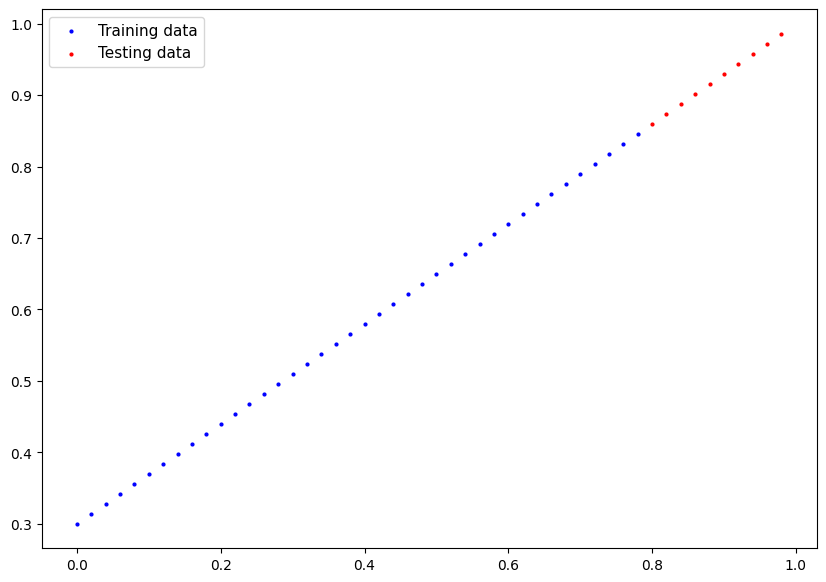

In [ ]:
plotpredictions()

In [ ]:
#build a model
class LinearRegressionModel(nn.Module):#everything in pytorch inherits from nn it is a base module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,x:torch.tensor)->torch.Tensor:
    return self.weights*x+self.bias




###Pytorch model building essential
* torch.nn-contains all the building for neural network
* torch.nn.Parameter-what parameter our m opdel try and learn
* torch.nn.Module-base class for all neural network module overwrite forward method
* torch.optim-where optimizers live
* def forward():-all nn.Module subclasses require you to overwrite forward(),this method defines what happens in the forward computation
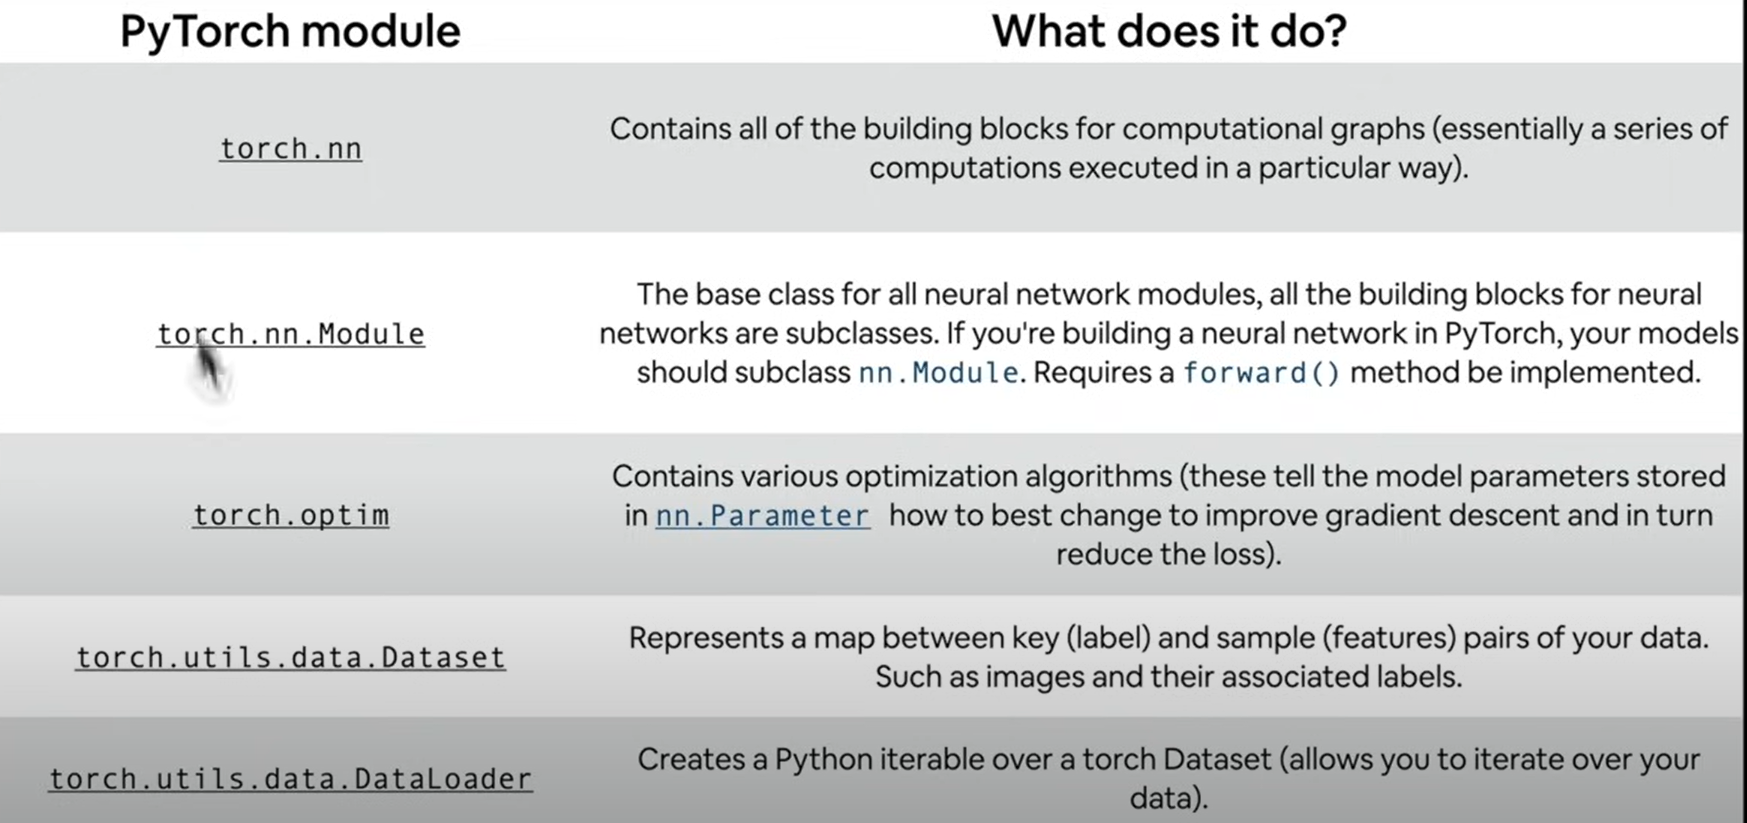




### Checking contents of our pytorch model
we can check it through `.parameters()`

In [ ]:

#create a random seed
torch.manual_seed(42)
#create a instance of model(this is a subclass of nn.Module)
model=LinearRegressionModel()
#checkout parameters
list(model.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#list of named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Making prediction usifn torch.inference_model()
with torch.inference_mode():#inference modes shuts down all the things needed for training ex grad tracking
    y_preds=model(x_test)
y_preds,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

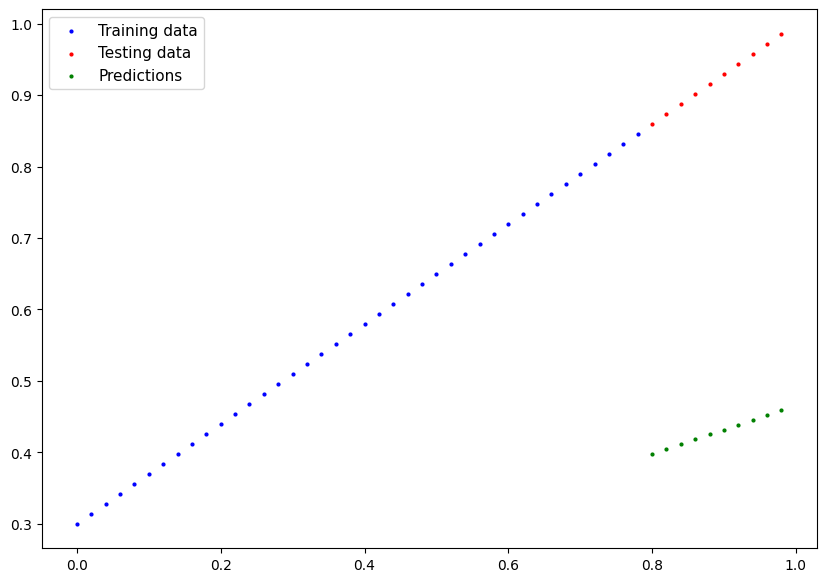

In [ ]:
plotpredictions(predictions=y_preds)



### Training the model
* chooose an optimizer
* create a training loop


In [ ]:
  #setup a loss function
loss_fn=nn.L1Loss()

#setup an optimizer
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.001)#learning rate

### Build a training loop
0. Loop thru data
1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step


In [ ]:

torch.manual_seed(42)
# epoch is a loop thru the data
epochs=1000

for epoch in range(epochs):
  #Seet thr model to train mode
  model.train() #train mode sets all parameter that require gradient

  # 1. Forward pass
  y_pred=model(x_train)

  # 2. calc loss
  loss=loss_fn(y_pred,y_train)


  #3. optimizer zero grad
  optimizer.zero_grad()

  #4.Loss backward
  loss.backward()

  #5.Step optimizer
  optimizer.step()


  model.eval()# turns off gradient or train setting
  with torch.inference_mode():
    test_pred=model(x_test)
    test_loss=loss_fn(test_pred,y_test)
  print(f"Epoch:{epoch}|loss:{loss}|Test loss:{test_loss}")


  print(model.state_dict())


Epoch:0|loss:0.31288138031959534|Test loss:0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch:1|loss:0.3117292523384094|Test loss:0.4918419420719147
OrderedDict([('weights', tensor([0.3375])), ('bias', tensor([0.1308]))])
Epoch:2|loss:0.3105771541595459|Test loss:0.49049490690231323
OrderedDict([('weights', tensor([0.3379])), ('bias', tensor([0.1318]))])
Epoch:3|loss:0.3094250559806824|Test loss:0.48914775252342224
OrderedDict([('weights', tensor([0.3383])), ('bias', tensor([0.1328]))])
Epoch:4|loss:0.30827295780181885|Test loss:0.4878006875514984
OrderedDict([('weights', tensor([0.3386])), ('bias', tensor([0.1338]))])
Epoch:5|loss:0.3071208596229553|Test loss:0.4864535331726074
OrderedDict([('weights', tensor([0.3390])), ('bias', tensor([0.1348]))])
Epoch:6|loss:0.3059687614440918|Test loss:0.4851064682006836
OrderedDict([('weights', tensor([0.3394])), ('bias', tensor([0.1358]))])
Epoch:7|loss:0.3048166334629059|Test loss:0.48375946283340

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [ ]:
with torch.inference_mode():
  y_pred_new=model(x_test)


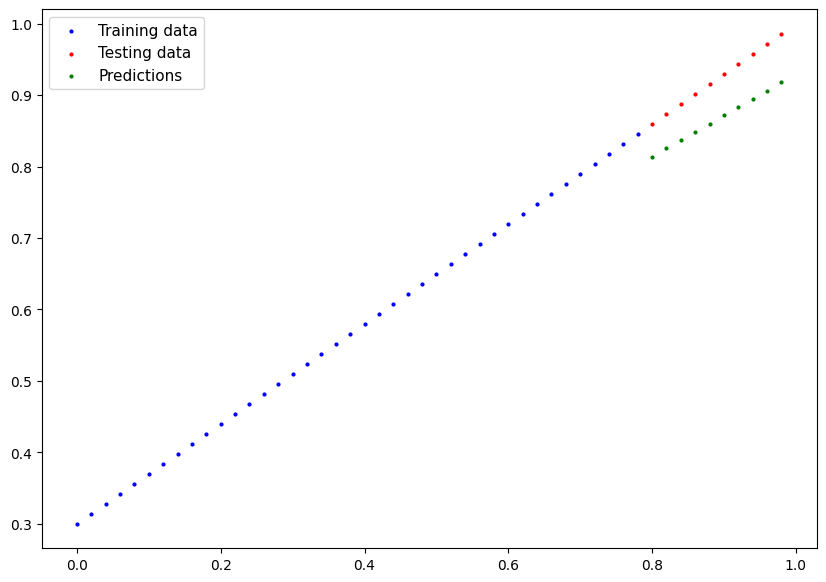

In [ ]:
plotpredictions(predictions=y_pred_new)

### Saving a model in PyTorch

Three main methods to sava and load models
* `torch.save()` - allows you to save a PyTorch object in Pythons pickle format
* `torch.load` - allow to load
* `torch.nn.Module.load_state_dict()` - this allows to load a models's saved state dictionary

In [ ]:
#saving models
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
#create model save path
MODEL_NAME="model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
#save the model state dict
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
ls -l models

total 4
-rw-r--r-- 1 root root 1496 Jun 13 08:52 model_0.pth


In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [ ]:
#To load in a saved state_dict we have to instantiate a new instance of our model
loaded_model_0=LinearRegressionModel()
#load the saved state_dict of model_0(this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))




<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

## Putting it all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Create device agnostic code
if we got gpu we will use it else cpu


In [ ]:
device="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
#create  a data set
weight=0.8
bias=0.4
start=0
end=2
step=0.2
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias

# train and test split
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

#creating a lr model
class LR(nn.Module):
  def __init__(self):
    super().__init__()
    #we dont initialize parameters all by hand insted use a layer
    #nn.Linear applies linear transform to the data
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

    #overwriting the forward method
  def forward(self,x:torch.tensor)->torch.tensor:
    return self.linear_layer(x)
#set the manual seed
torch.manual_seed(42)
model1=LR()
model1,model1.state_dict()



(LR(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#check current device of model
next(model1.parameters()).device

device(type='cpu')

In [ ]:
# #set the model to use target device
# model1.to(device)
# next(model1.parameters()).device

In [ ]:
#creating the training loop and testing loop
lossfn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.01)
torch.manual_seed(42)
epoch=300

#put data on target device
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

for epoch in range(epoch):
  #initialize the module
  model1.train()
  #Forward pass
  y_pred=model1(x_train)
  #calculate the loss
  loss=lossfn(y_pred,y_train)
  #optimizer zero grad
  optimizer.zero_grad()
  #Perform backprop
  loss.backward()
  #optimizer step ->updates the parameters
  optimizer.step()


  ###Testing
  #set model in eval mode
  model1.eval()
  with torch.inference_mode():
    test_pred=model1(x_test)
    test_loss=lossfn(test_pred,y_test)
    #print it
    if epoch%10==0:
      print(f"Epoch:{epoch} | train loss:{loss} | test loss:{test_loss}")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
model1.state_dict()

Making and evaluating predictions

In [ ]:
model1.eval()
#make prediction
with torch.inference_mode():
  y_preds=model1(x_test)



In [ ]:
plotpredictions(train_data=x_train.cpu(),
                    train_labels=y_train.cpu(),
                    test_data=x_test.cpu(),
                    test_labels=y_test.cpu(),
                    predictions=y_preds.cpu())

In [ ]:
#save
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="model1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model1.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
#load a model
loaded_model_1=LR()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(x_test)
y_preds==loaded_model_1_preds